In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
%matplotlib inline

In [3]:
from sklearn.preprocessing import scale

map = {}
xls = pd.ExcelFile('nba_draft.xlsx')
for sheet_name in xls.sheet_names:
    map[sheet_name] = xls.parse(sheet_name)
# variable_names = columns=map['draft_data_2019'].columns
df = map['draft_data_2018']
# df = df.iloc[:, 4:-4]
df = df.iloc[:, 41:-5]

data = df.to_numpy()
print(data[0:3])

[[11.3  4.3  1.6]
 [17.   7.6  2.4]
 [10.   6.7  0.3]]


In [4]:
clustering  = KMeans(n_clusters=5,random_state=5)
clustering.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [5]:
player_df = map['draft_data_2018']
player_df = player_df.iloc[:, 41:-5]
player_df.columns = ['ppg','rpg','apg']
# y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

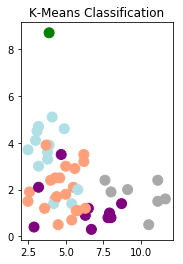

In [6]:
color_theme = np.array(['darkgray','lightsalmon','powderblue','green', 'purple'])
# ground_truth = [3,0,1,2,1,1,0,4,3,2,3,3,1,1,3,1,1,3,3,1,3,1,4,1,2,2,4,3,1,4,2,4,2,3,3,1,3,3,1,2,2,1,3,0,2,0,1,1,1,0,2,4]

# plt.subplot(1,2,1)
# plt.scatter(x=player_df.rpg,y=player_df.apg,c=color_theme[ground_truth],s=100)
# plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=player_df.rpg,y=player_df.apg,c=color_theme[clustering.labels_],s=100)
plt.title('K-Means Classification')